# Agent environment with bitflipping actions, and random target

## Objective
The state space is $S=\{0,1\}^n$ for fixed $n$. The objective is to find a policy $\pi_t(s)$ (where the policy is dependent on $t \in S$) such that we are able to reach $t$ by flipping bits. The actions are represented by $A=\{0,\cdots,n-1\}$ representing which bit to be flipped. The corresponding DQN would be $Q: (s,t,a) \in S \times S \times A \rightarrow \mathbb{R}$.

## Neural network model details
 * Input: $\mathbb{R}^n \times \mathbb{R}^n$ vector representing the bit sequence (e.g. $00011 \sim (0, 0, 0, 1, 1)$) of state and goal.
 * Output: $\mathbb{R}^{n}$ vector of the $Q$-values
    * The index corresponds to integer $\geq 0$ representing the index of the bit being flipped
    * So $\text{model}(s,t)[a]$ will be the $Q$-value
 * Architecture: Simple MLP

## Training method
Simple DQN with replay
   * Exploration step -> update Q network -> validation step

**Exploration step**
We initialize 16 agents starting at random starting states (for each agent). The actions will be according to the DQN agent, and with probability $\epsilon$, a random action will be picked uniformly. We add this to the experience buffer. The episode has at most $n$ steps.

**Update Q network**
Update the DQN to match Bellman's equation using a randomly sampled batch size ($=256$), and this is done with gradient descent.

**Validation step**
Access the performance of the learnt policy. Initialize 1024 agents, and let the agent fully decide the actions (we do not replace actions with probability $\epsilon$ with uniform distribution). Since this is the validation step, this should not interfere with the training process, and the experience buffer/model weights won't be updated.


## Notes
For an optimal agent, $E[\text{steps}] = \frac{1}{2^n}\sum_{k=0}^n \dbinom{n}{k}k = \frac{n}{2}$. We expect the average number of steps to be close to $\frac{n}{2}$ if an optimal agent is chosen.

In [1]:
import torch
import src.runtime as runtime
from src.runtime import train_DQN_agent

device = torch.device("cuda:0")

### Testing $n=5$, UVFA

Initialized FlippingBitSequenceEnvRNGTarget with n = 5
-------------------- Initializing DQNAgent --------------------
gamma: 0.9
epsilon: 1.0
epsilon_min: 0.1
epsilon_decay: 0.999
learning_rate: 0.001


  3%|▎         | 103/3000 [00:06<02:43, 17.76it/s]

Episode: 99/3000, Epsilon: 0.6063789448611848, Success rate: 0.98, Avg steps to success: 2.56, Loss: 0.002178


  7%|▋         | 201/3000 [00:11<02:05, 22.28it/s]

Episode: 199/3000, Epsilon: 0.3676954247709635, Success rate: 1.00, Avg steps to success: 2.56, Loss: 0.000176


  7%|▋         | 209/3000 [00:12<02:45, 16.91it/s]


Early stopping at episode 209
Episode: 209/3000, Epsilon: 0.349753957504439, Success rate: 1.00, Avg steps to success: 2.47, Loss: 0.000147


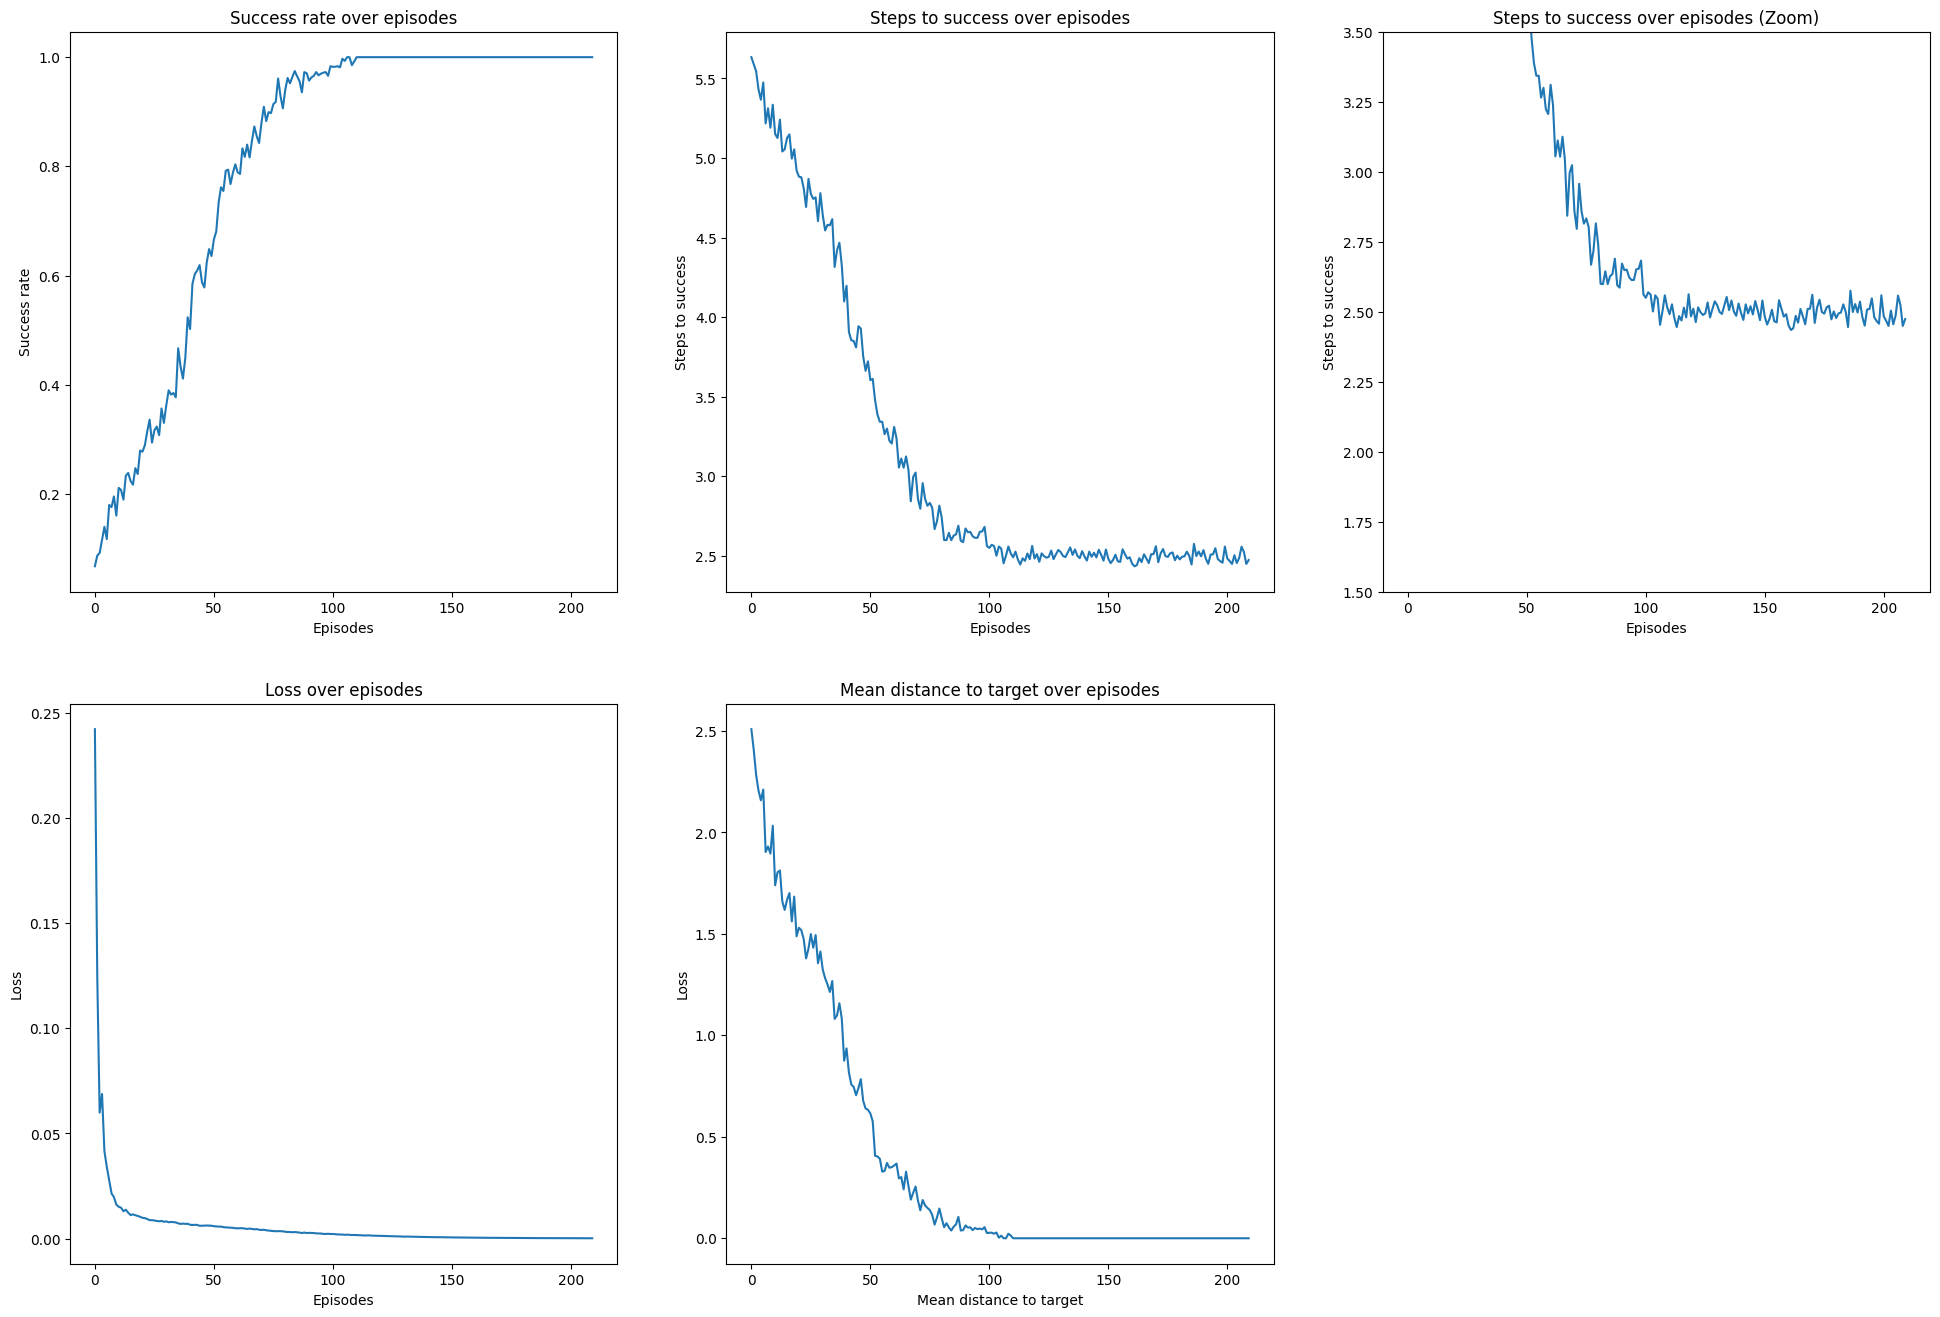

In [2]:
agent, env = train_DQN_agent(5, device=device, episodes=3000, use_HER=False, model_type=runtime.UVFA)

### Testing $n=10$, UVFA

Initialized FlippingBitSequenceEnvRNGTarget with n = 10
-------------------- Initializing DQNAgent --------------------
gamma: 0.9
epsilon: 1.0
epsilon_min: 0.1
epsilon_decay: 0.999
learning_rate: 0.001


  3%|▎         | 101/3000 [00:10<04:44, 10.21it/s]

Episode: 99/3000, Epsilon: 0.6063789448611848, Success rate: 0.00, Avg steps to success: 10.97, Loss: 0.001102


  7%|▋         | 202/3000 [00:20<04:02, 11.55it/s]

Episode: 199/3000, Epsilon: 0.3676954247709635, Success rate: 0.00, Avg steps to success: 10.96, Loss: 0.000507


 10%|█         | 301/3000 [00:31<04:57,  9.06it/s]

Episode: 299/3000, Epsilon: 0.22296276370290227, Success rate: 0.00, Avg steps to success: 10.95, Loss: 0.000680


 13%|█▎        | 401/3000 [00:44<05:31,  7.85it/s]

Episode: 399/3000, Epsilon: 0.1351999253974994, Success rate: 0.01, Avg steps to success: 10.89, Loss: 0.000879


 17%|█▋        | 501/3000 [00:56<05:28,  7.61it/s]

Episode: 499/3000, Epsilon: 0.1, Success rate: 0.04, Avg steps to success: 10.73, Loss: 0.001237


 20%|██        | 601/3000 [01:08<05:10,  7.72it/s]

Episode: 599/3000, Epsilon: 0.1, Success rate: 0.09, Avg steps to success: 10.43, Loss: 0.002994


 23%|██▎       | 701/3000 [01:22<05:33,  6.89it/s]

Episode: 699/3000, Epsilon: 0.1, Success rate: 0.38, Avg steps to success: 8.65, Loss: 0.004602


 27%|██▋       | 801/3000 [01:34<04:36,  7.97it/s]

Episode: 799/3000, Epsilon: 0.1, Success rate: 0.91, Avg steps to success: 5.54, Loss: 0.004467


 30%|███       | 901/3000 [01:45<03:35,  9.72it/s]

Episode: 899/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 4.99, Loss: 0.001214


 33%|███▎      | 1001/3000 [01:57<03:44,  8.92it/s]

Episode: 999/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 4.96, Loss: 0.000489


 33%|███▎      | 1003/3000 [01:57<03:54,  8.53it/s]

Early stopping at episode 1003
Episode: 1003/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 4.86, Loss: 0.000495


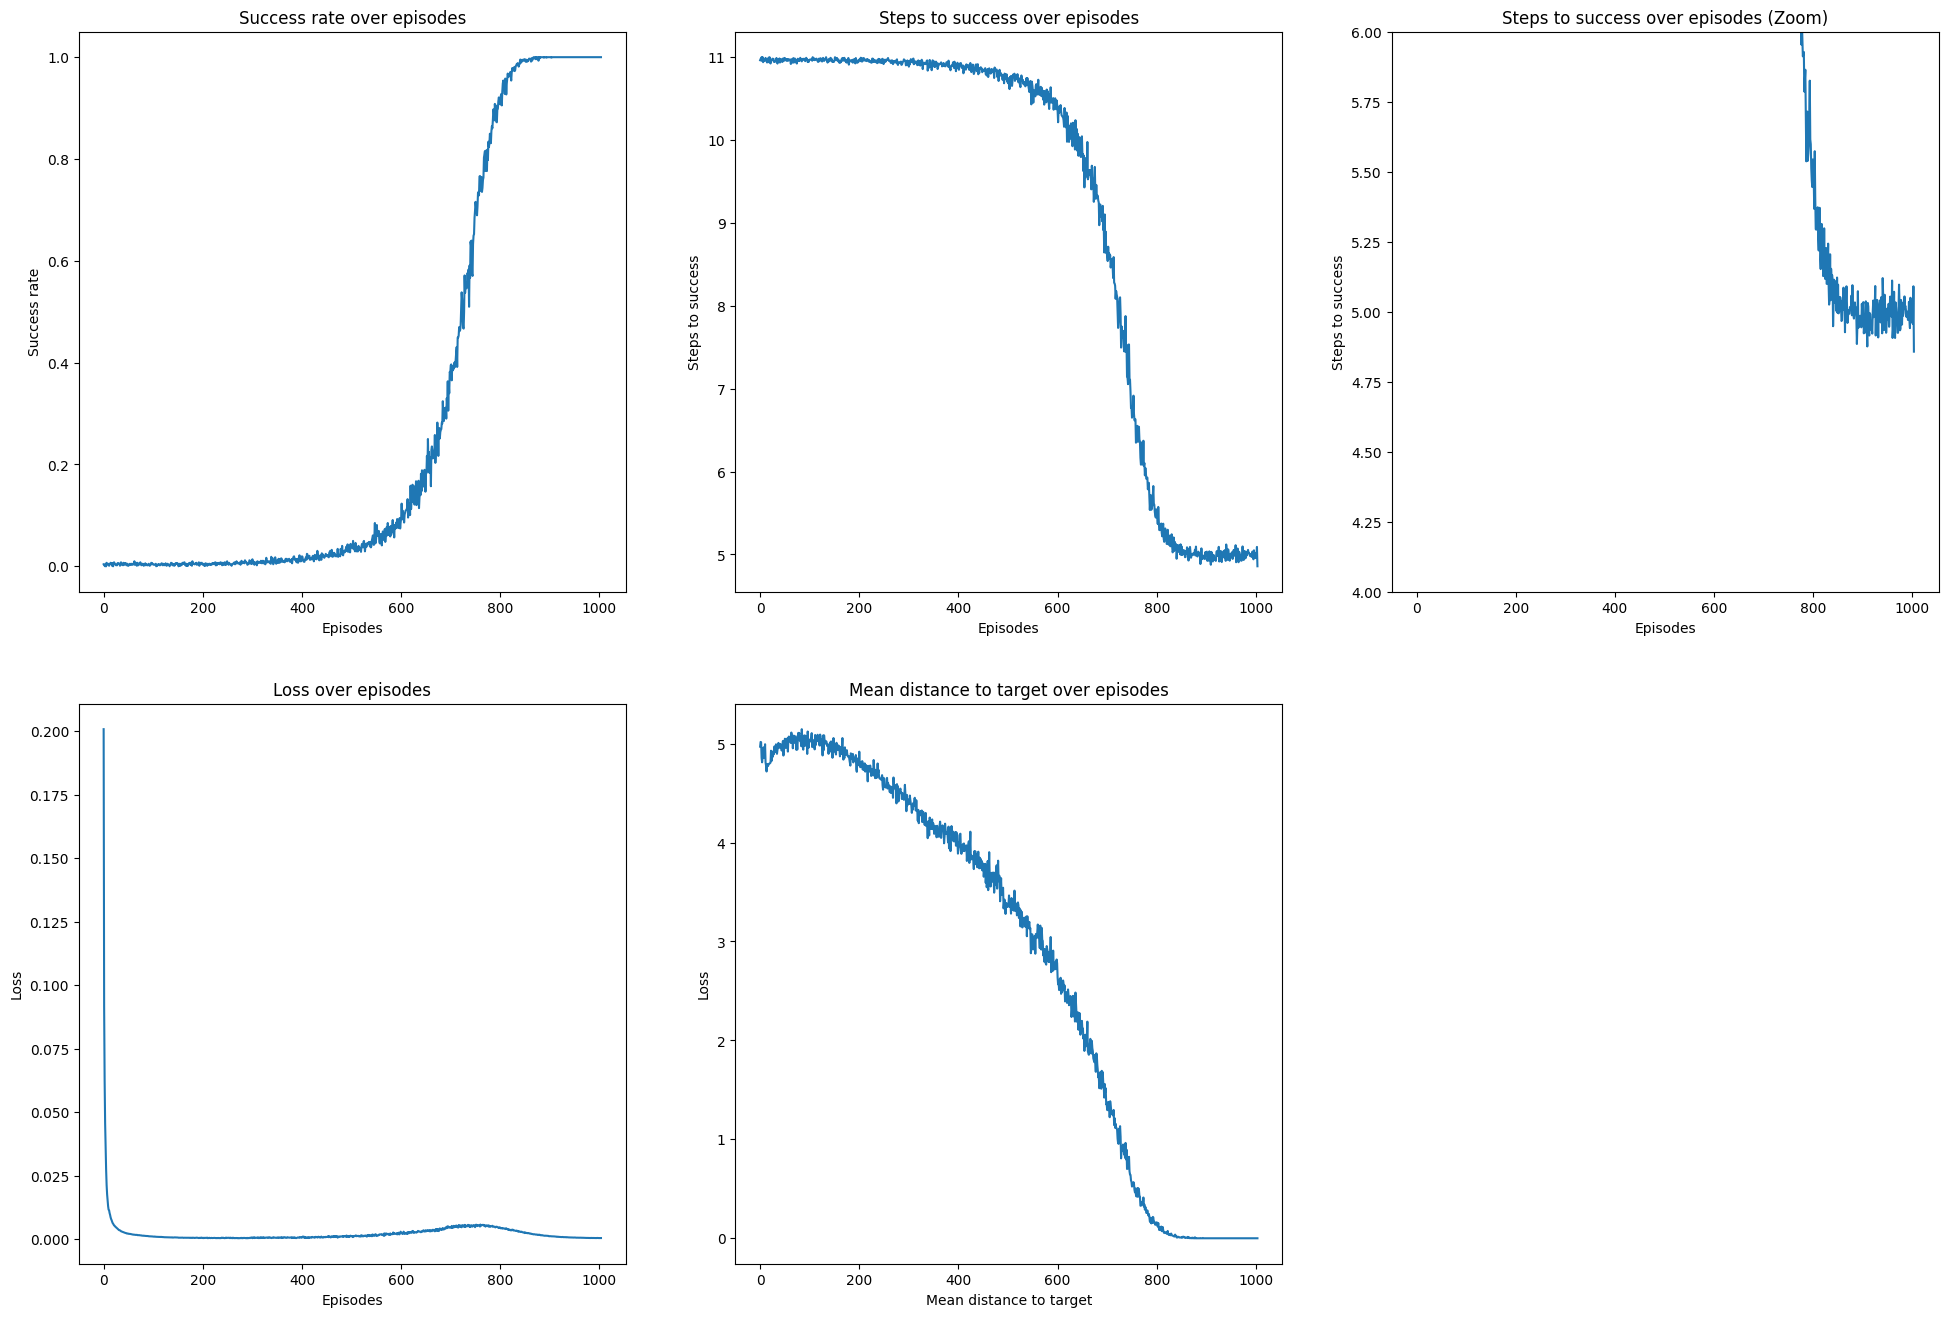

In [3]:
agent, env = train_DQN_agent(10, device=device, episodes=3000, use_HER=False, model_type=runtime.UVFA)

### Testing $n=15$, UVFA

Initialized FlippingBitSequenceEnvRNGTarget with n = 15
-------------------- Initializing DQNAgent --------------------
gamma: 0.9
epsilon: 1.0
epsilon_min: 0.1
epsilon_decay: 0.999
learning_rate: 0.001


  3%|▎         | 101/3000 [00:12<05:24,  8.93it/s]

Episode: 99/3000, Epsilon: 0.6063789448611848, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.001334


  7%|▋         | 201/3000 [00:27<07:11,  6.49it/s]

Episode: 199/3000, Epsilon: 0.3676954247709635, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.000571


 10%|█         | 301/3000 [00:44<07:25,  6.05it/s]

Episode: 299/3000, Epsilon: 0.22296276370290227, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.000294


 13%|█▎        | 401/3000 [01:02<07:59,  5.43it/s]

Episode: 399/3000, Epsilon: 0.1351999253974994, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.000148


 17%|█▋        | 500/3000 [01:20<07:48,  5.34it/s]

Episode: 499/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.000097


 20%|██        | 600/3000 [01:40<07:53,  5.07it/s]

Episode: 599/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 15.99, Loss: 0.000075


 23%|██▎       | 700/3000 [02:00<07:26,  5.15it/s]

Episode: 699/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.000068


 27%|██▋       | 801/3000 [02:19<07:16,  5.04it/s]

Episode: 799/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.000060


 30%|███       | 900/3000 [02:38<07:01,  4.98it/s]

Episode: 899/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.000055


 33%|███▎      | 1000/3000 [02:57<06:46,  4.92it/s]

Episode: 999/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.000048


 37%|███▋      | 1101/3000 [03:15<05:21,  5.91it/s]

Episode: 1099/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.000047


 40%|████      | 1201/3000 [03:32<04:42,  6.38it/s]

Episode: 1199/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.000111


 43%|████▎     | 1301/3000 [03:48<04:37,  6.11it/s]

Episode: 1299/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.000097


 47%|████▋     | 1401/3000 [04:06<04:41,  5.68it/s]

Episode: 1399/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.000039


 50%|█████     | 1501/3000 [04:23<04:39,  5.36it/s]

Episode: 1499/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.000038


 53%|█████▎    | 1601/3000 [04:41<04:07,  5.64it/s]

Episode: 1599/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.000034


 57%|█████▋    | 1700/3000 [05:01<04:24,  4.92it/s]

Episode: 1699/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.000086


 60%|██████    | 1801/3000 [05:19<03:15,  6.13it/s]

Episode: 1799/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.000033


 63%|██████▎   | 1900/3000 [05:39<04:01,  4.55it/s]

Episode: 1899/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.000096


 67%|██████▋   | 2001/3000 [06:00<03:16,  5.09it/s]

Episode: 1999/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.000092


 70%|███████   | 2101/3000 [06:19<02:56,  5.10it/s]

Episode: 2099/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.000030


 73%|███████▎  | 2200/3000 [06:38<02:33,  5.22it/s]

Episode: 2199/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.000026


 77%|███████▋  | 2301/3000 [06:58<02:19,  5.02it/s]

Episode: 2299/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.000102


 80%|████████  | 2401/3000 [07:18<01:46,  5.62it/s]

Episode: 2399/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.000030


 83%|████████▎ | 2501/3000 [07:38<01:34,  5.28it/s]

Episode: 2499/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.000168


 87%|████████▋ | 2601/3000 [07:59<01:17,  5.12it/s]

Episode: 2599/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.000025


 90%|█████████ | 2701/3000 [08:19<00:56,  5.26it/s]

Episode: 2699/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.000025


 93%|█████████▎| 2800/3000 [08:38<00:45,  4.43it/s]

Episode: 2799/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.000025


 97%|█████████▋| 2901/3000 [09:00<00:20,  4.79it/s]

Episode: 2899/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.000028


100%|██████████| 3000/3000 [09:20<00:00,  5.35it/s]


Episode: 2999/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 16.00, Loss: 0.000021


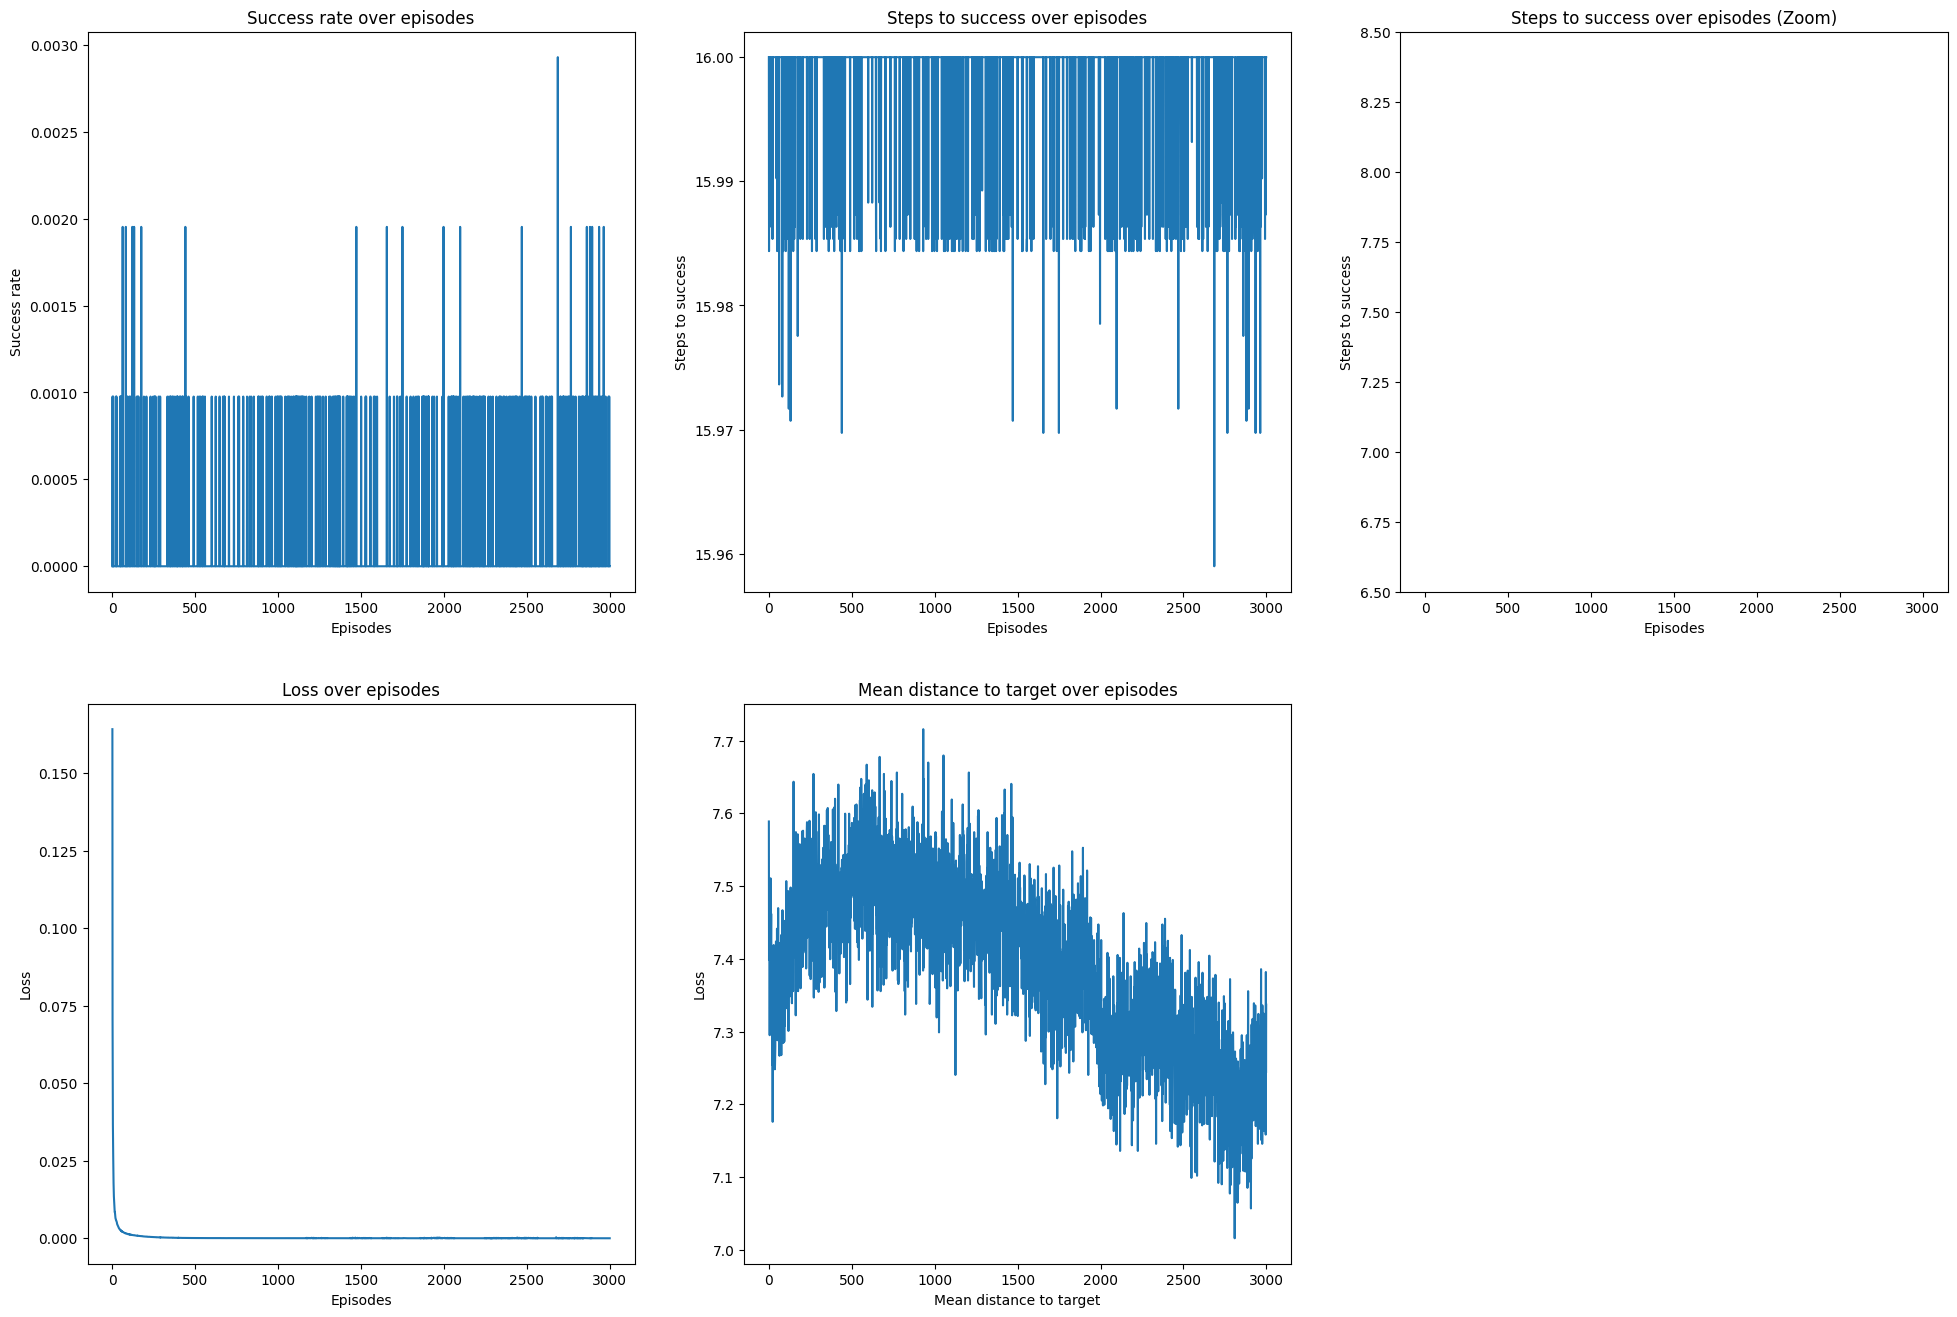

In [4]:
agent, env = train_DQN_agent(15, device=device, episodes=3000, use_HER=False, model_type=runtime.UVFA)

### Testing $n=20$, UVFA

Initialized FlippingBitSequenceEnvRNGTarget with n = 20
-------------------- Initializing DQNAgent --------------------
gamma: 0.9
epsilon: 1.0
epsilon_min: 0.1
epsilon_decay: 0.999
learning_rate: 0.001


  3%|▎         | 101/3000 [00:16<07:46,  6.22it/s]

Episode: 99/3000, Epsilon: 0.6063789448611848, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.001705


  7%|▋         | 200/3000 [00:46<13:24,  3.48it/s]

Episode: 199/3000, Epsilon: 0.3676954247709635, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000719


 10%|█         | 300/3000 [01:15<12:06,  3.72it/s]

Episode: 299/3000, Epsilon: 0.22296276370290227, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000359


 13%|█▎        | 400/3000 [01:43<13:06,  3.31it/s]

Episode: 399/3000, Epsilon: 0.1351999253974994, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000211


 17%|█▋        | 500/3000 [02:13<13:23,  3.11it/s]

Episode: 499/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000141


 20%|██        | 600/3000 [02:41<10:22,  3.86it/s]

Episode: 599/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000113


 23%|██▎       | 700/3000 [03:08<12:11,  3.15it/s]

Episode: 699/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000096


 27%|██▋       | 800/3000 [03:38<10:40,  3.43it/s]

Episode: 799/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000087


 30%|███       | 900/3000 [04:03<10:16,  3.41it/s]

Episode: 899/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000086


 33%|███▎      | 1000/3000 [04:31<08:15,  4.03it/s]

Episode: 999/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000080


 37%|███▋      | 1100/3000 [04:59<09:12,  3.44it/s]

Episode: 1099/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000067


 40%|████      | 1200/3000 [05:26<08:52,  3.38it/s]

Episode: 1199/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000066


 43%|████▎     | 1300/3000 [05:55<07:53,  3.59it/s]

Episode: 1299/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000063


 47%|████▋     | 1400/3000 [06:23<07:30,  3.55it/s]

Episode: 1399/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000059


 50%|█████     | 1500/3000 [06:51<07:11,  3.47it/s]

Episode: 1499/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000059


 53%|█████▎    | 1600/3000 [07:19<06:30,  3.58it/s]

Episode: 1599/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000055


 57%|█████▋    | 1700/3000 [07:48<05:49,  3.72it/s]

Episode: 1699/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000051


 60%|██████    | 1800/3000 [08:16<04:50,  4.14it/s]

Episode: 1799/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000050


 63%|██████▎   | 1900/3000 [08:45<05:04,  3.61it/s]

Episode: 1899/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000048


 67%|██████▋   | 2000/3000 [09:14<04:34,  3.64it/s]

Episode: 1999/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000044


 70%|███████   | 2100/3000 [09:43<04:36,  3.26it/s]

Episode: 2099/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000041


 73%|███████▎  | 2200/3000 [10:08<03:25,  3.89it/s]

Episode: 2199/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000040


 77%|███████▋  | 2300/3000 [10:36<03:48,  3.07it/s]

Episode: 2299/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000036


 80%|████████  | 2400/3000 [11:06<02:53,  3.46it/s]

Episode: 2399/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000036


 83%|████████▎ | 2500/3000 [11:35<02:20,  3.56it/s]

Episode: 2499/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000035


 87%|████████▋ | 2600/3000 [12:02<01:28,  4.52it/s]

Episode: 2599/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000034


 90%|█████████ | 2700/3000 [12:30<01:18,  3.84it/s]

Episode: 2699/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000035


 93%|█████████▎| 2800/3000 [12:57<00:58,  3.41it/s]

Episode: 2799/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000033


 97%|█████████▋| 2900/3000 [13:24<00:28,  3.50it/s]

Episode: 2899/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000033


100%|██████████| 3000/3000 [13:50<00:00,  3.61it/s]

Episode: 2999/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 21.00, Loss: 0.000030


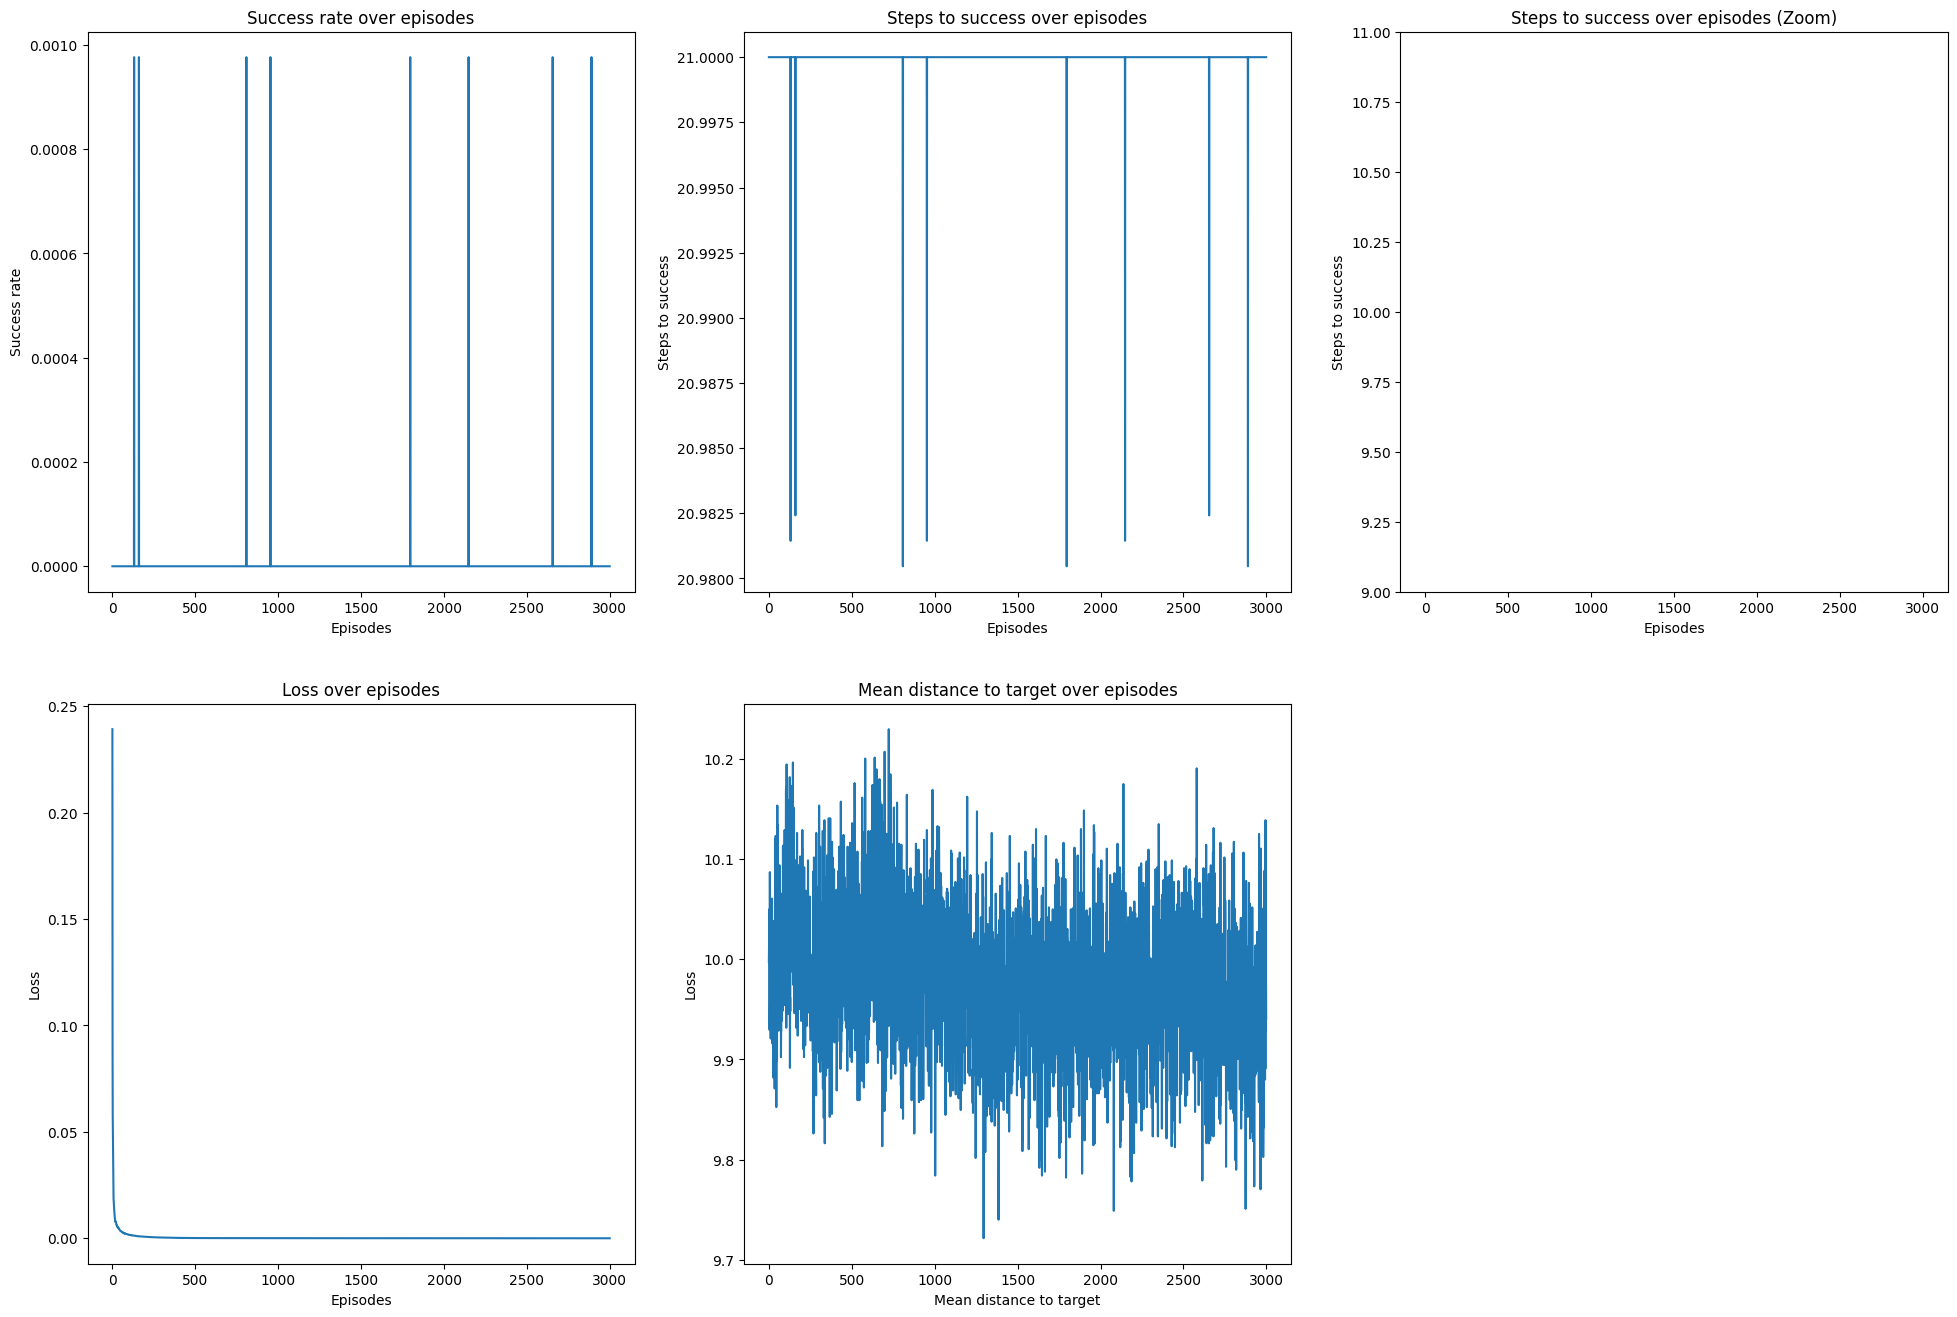

In [5]:
agent, env = train_DQN_agent(20, device=device, episodes=3000, use_HER=False, model_type=runtime.UVFA)

### Testing $n=20$, Handcrafted

Initialized FlippingBitSequenceEnvRNGTarget with n = 20
-------------------- Initializing DQNAgent --------------------
gamma: 0.9
epsilon: 1.0
epsilon_min: 0.1
epsilon_decay: 0.999
learning_rate: 0.001


  3%|▎         | 102/3000 [00:08<03:23, 14.26it/s]

Episode: 99/3000, Epsilon: 0.6063789448611848, Success rate: 0.05, Avg steps to success: 20.19, Loss: 0.000003


  7%|▋         | 200/3000 [00:26<09:06,  5.12it/s]

Episode: 199/3000, Epsilon: 0.3676954247709635, Success rate: 0.59, Avg steps to success: 13.55, Loss: 0.000015


 10%|█         | 301/3000 [00:43<08:56,  5.03it/s]

Episode: 299/3000, Epsilon: 0.22296276370290227, Success rate: 0.98, Avg steps to success: 10.10, Loss: 0.000017


 13%|█▎        | 400/3000 [01:01<10:09,  4.27it/s]

Episode: 399/3000, Epsilon: 0.1351999253974994, Success rate: 1.00, Avg steps to success: 10.04, Loss: 0.000004


 16%|█▌        | 483/3000 [01:17<06:45,  6.21it/s]


Early stopping at episode 483
Episode: 483/3000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 10.04, Loss: 0.000067


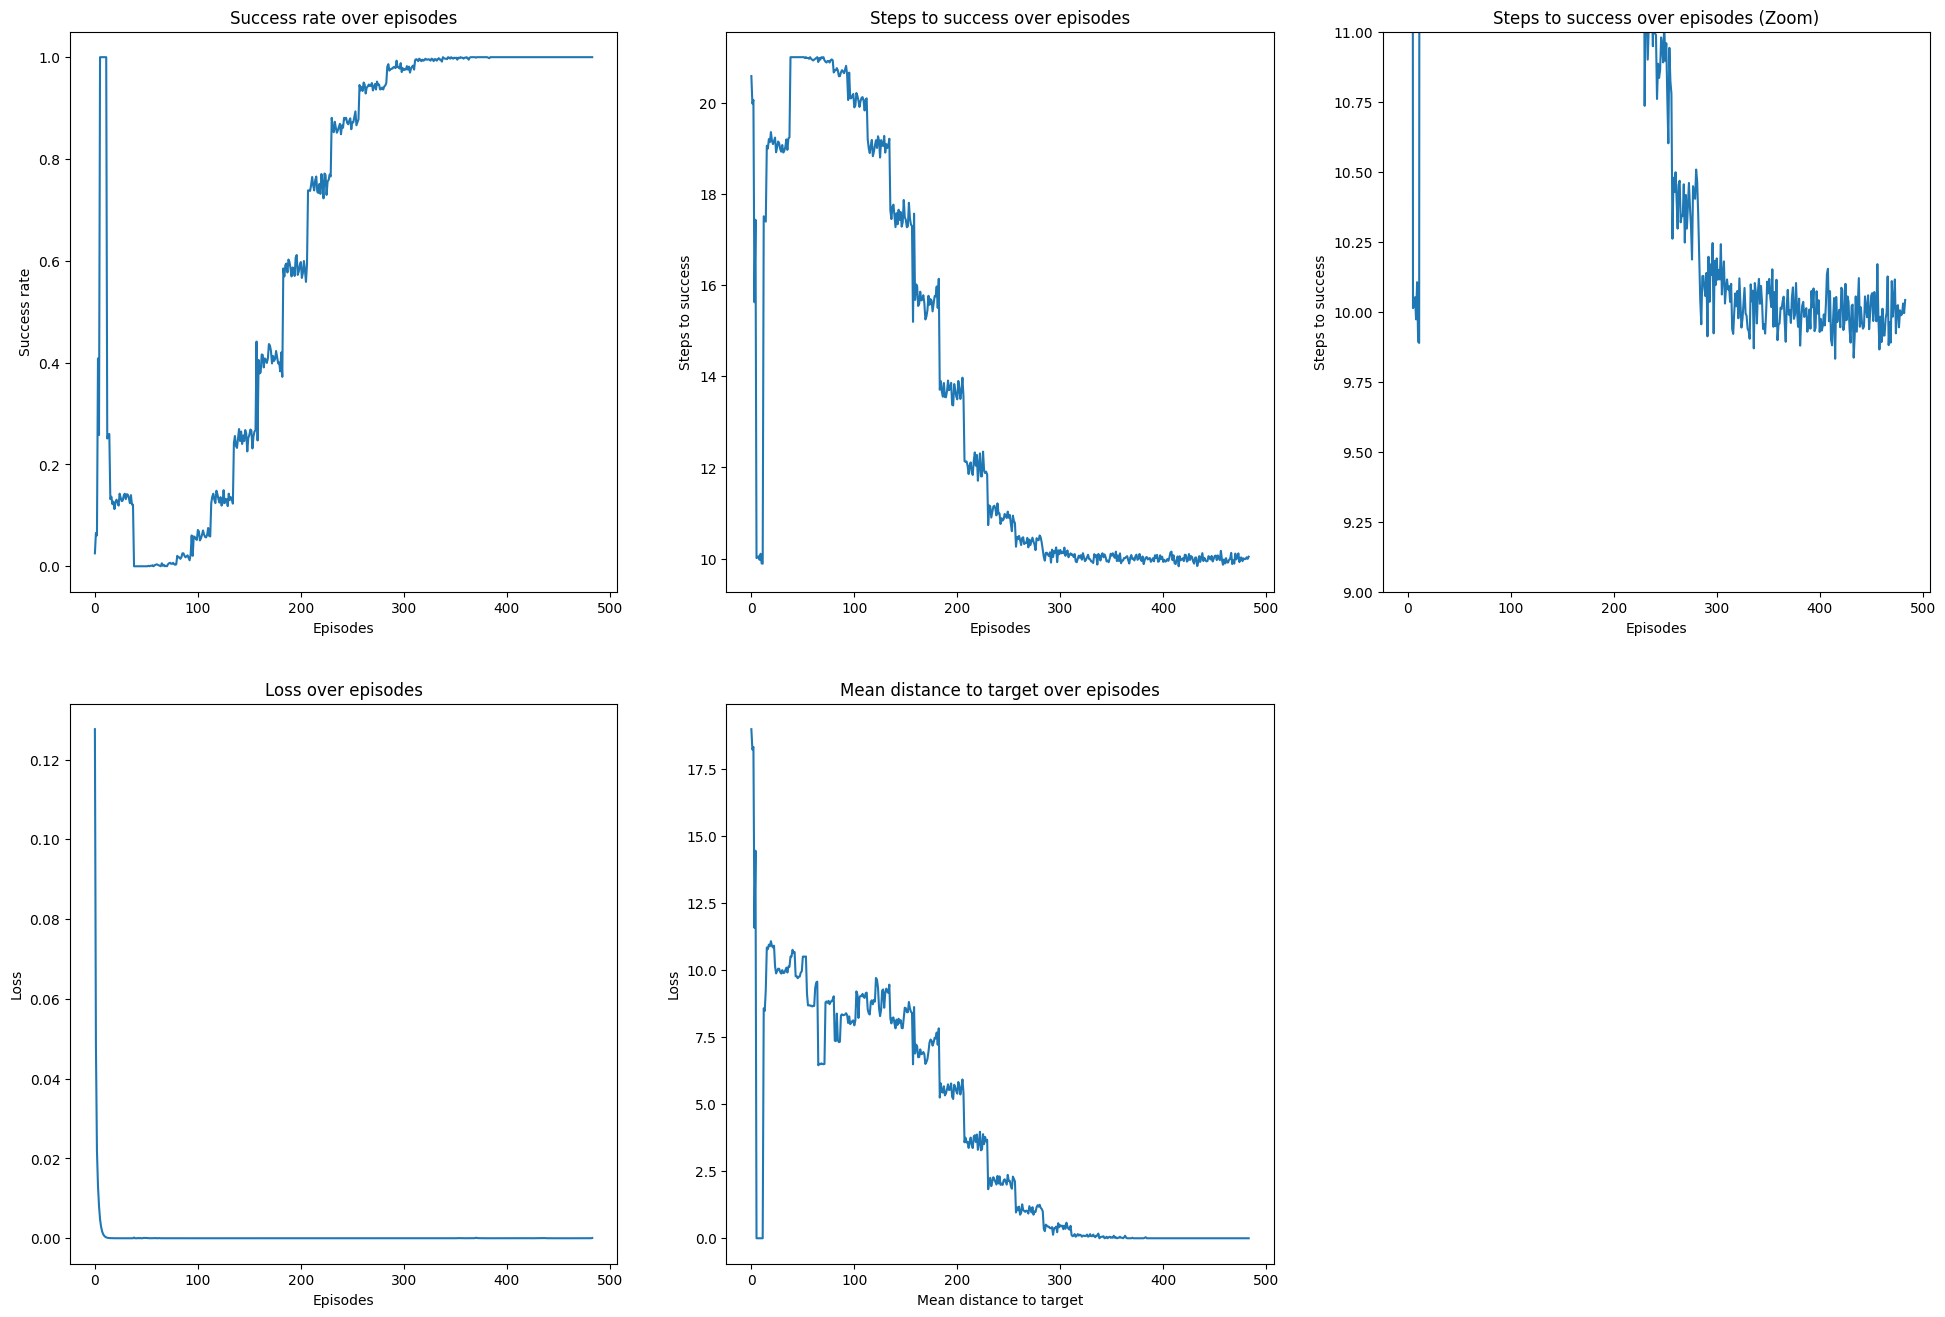

In [6]:
agent, env = train_DQN_agent(20, device=device, episodes=3000, use_HER=False, model_type=runtime.HANDCRAFTED)

### Testing $n=30$, Handcrafted

Initialized FlippingBitSequenceEnvRNGTarget with n = 30
-------------------- Initializing DQNAgent --------------------
gamma: 0.9
epsilon: 1.0
epsilon_min: 0.1
epsilon_decay: 0.999
learning_rate: 0.001


  3%|▎         | 100/3000 [00:18<13:31,  3.57it/s]

Episode: 99/3000, Epsilon: 0.6063789448611848, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000001


  7%|▋         | 200/3000 [00:44<12:57,  3.60it/s]

Episode: 199/3000, Epsilon: 0.3676954247709635, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000010


 10%|█         | 300/3000 [01:07<12:31,  3.59it/s]

Episode: 299/3000, Epsilon: 0.22296276370290227, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000003


 13%|█▎        | 400/3000 [01:34<11:12,  3.86it/s]

Episode: 399/3000, Epsilon: 0.1351999253974994, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000000


 17%|█▋        | 500/3000 [01:59<10:06,  4.12it/s]

Episode: 499/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000000


 20%|██        | 600/3000 [02:25<10:33,  3.79it/s]

Episode: 599/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000000


 23%|██▎       | 701/3000 [02:51<07:58,  4.80it/s]

Episode: 699/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000000


 27%|██▋       | 800/3000 [03:16<08:14,  4.45it/s]

Episode: 799/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000000


 30%|███       | 900/3000 [03:39<07:49,  4.47it/s]

Episode: 899/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000000


 33%|███▎      | 1000/3000 [04:01<06:58,  4.78it/s]

Episode: 999/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000000


 37%|███▋      | 1100/3000 [04:23<08:15,  3.83it/s]

Episode: 1099/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000000


 40%|████      | 1200/3000 [04:44<06:18,  4.76it/s]

Episode: 1199/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000000


 43%|████▎     | 1300/3000 [05:06<06:27,  4.39it/s]

Episode: 1299/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000000


 47%|████▋     | 1400/3000 [05:27<06:20,  4.20it/s]

Episode: 1399/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000000


 50%|█████     | 1501/3000 [05:52<05:03,  4.93it/s]

Episode: 1499/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000000


 53%|█████▎    | 1601/3000 [06:17<03:47,  6.15it/s]

Episode: 1599/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000000


 57%|█████▋    | 1701/3000 [06:37<04:31,  4.78it/s]

Episode: 1699/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000000


 60%|██████    | 1800/3000 [07:00<04:36,  4.34it/s]

Episode: 1799/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000000


 63%|██████▎   | 1900/3000 [07:21<04:07,  4.45it/s]

Episode: 1899/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000000


 67%|██████▋   | 2000/3000 [07:45<03:37,  4.59it/s]

Episode: 1999/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000000


 70%|███████   | 2101/3000 [08:07<03:12,  4.66it/s]

Episode: 2099/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000000


 73%|███████▎  | 2201/3000 [08:27<02:20,  5.67it/s]

Episode: 2199/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000000


 77%|███████▋  | 2301/3000 [08:48<02:21,  4.94it/s]

Episode: 2299/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000000


 80%|████████  | 2400/3000 [09:09<02:02,  4.91it/s]

Episode: 2399/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000000


 83%|████████▎ | 2500/3000 [09:29<01:39,  5.02it/s]

Episode: 2499/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000000


 87%|████████▋ | 2600/3000 [09:50<01:19,  5.01it/s]

Episode: 2599/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000000


 90%|█████████ | 2701/3000 [10:11<00:58,  5.10it/s]

Episode: 2699/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000000


 93%|█████████▎| 2800/3000 [10:32<00:41,  4.84it/s]

Episode: 2799/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000000


 97%|█████████▋| 2900/3000 [10:54<00:20,  4.79it/s]

Episode: 2899/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000000


100%|██████████| 3000/3000 [11:14<00:00,  4.45it/s]


Episode: 2999/3000, Epsilon: 0.1, Success rate: 0.00, Avg steps to success: 31.00, Loss: 0.000000


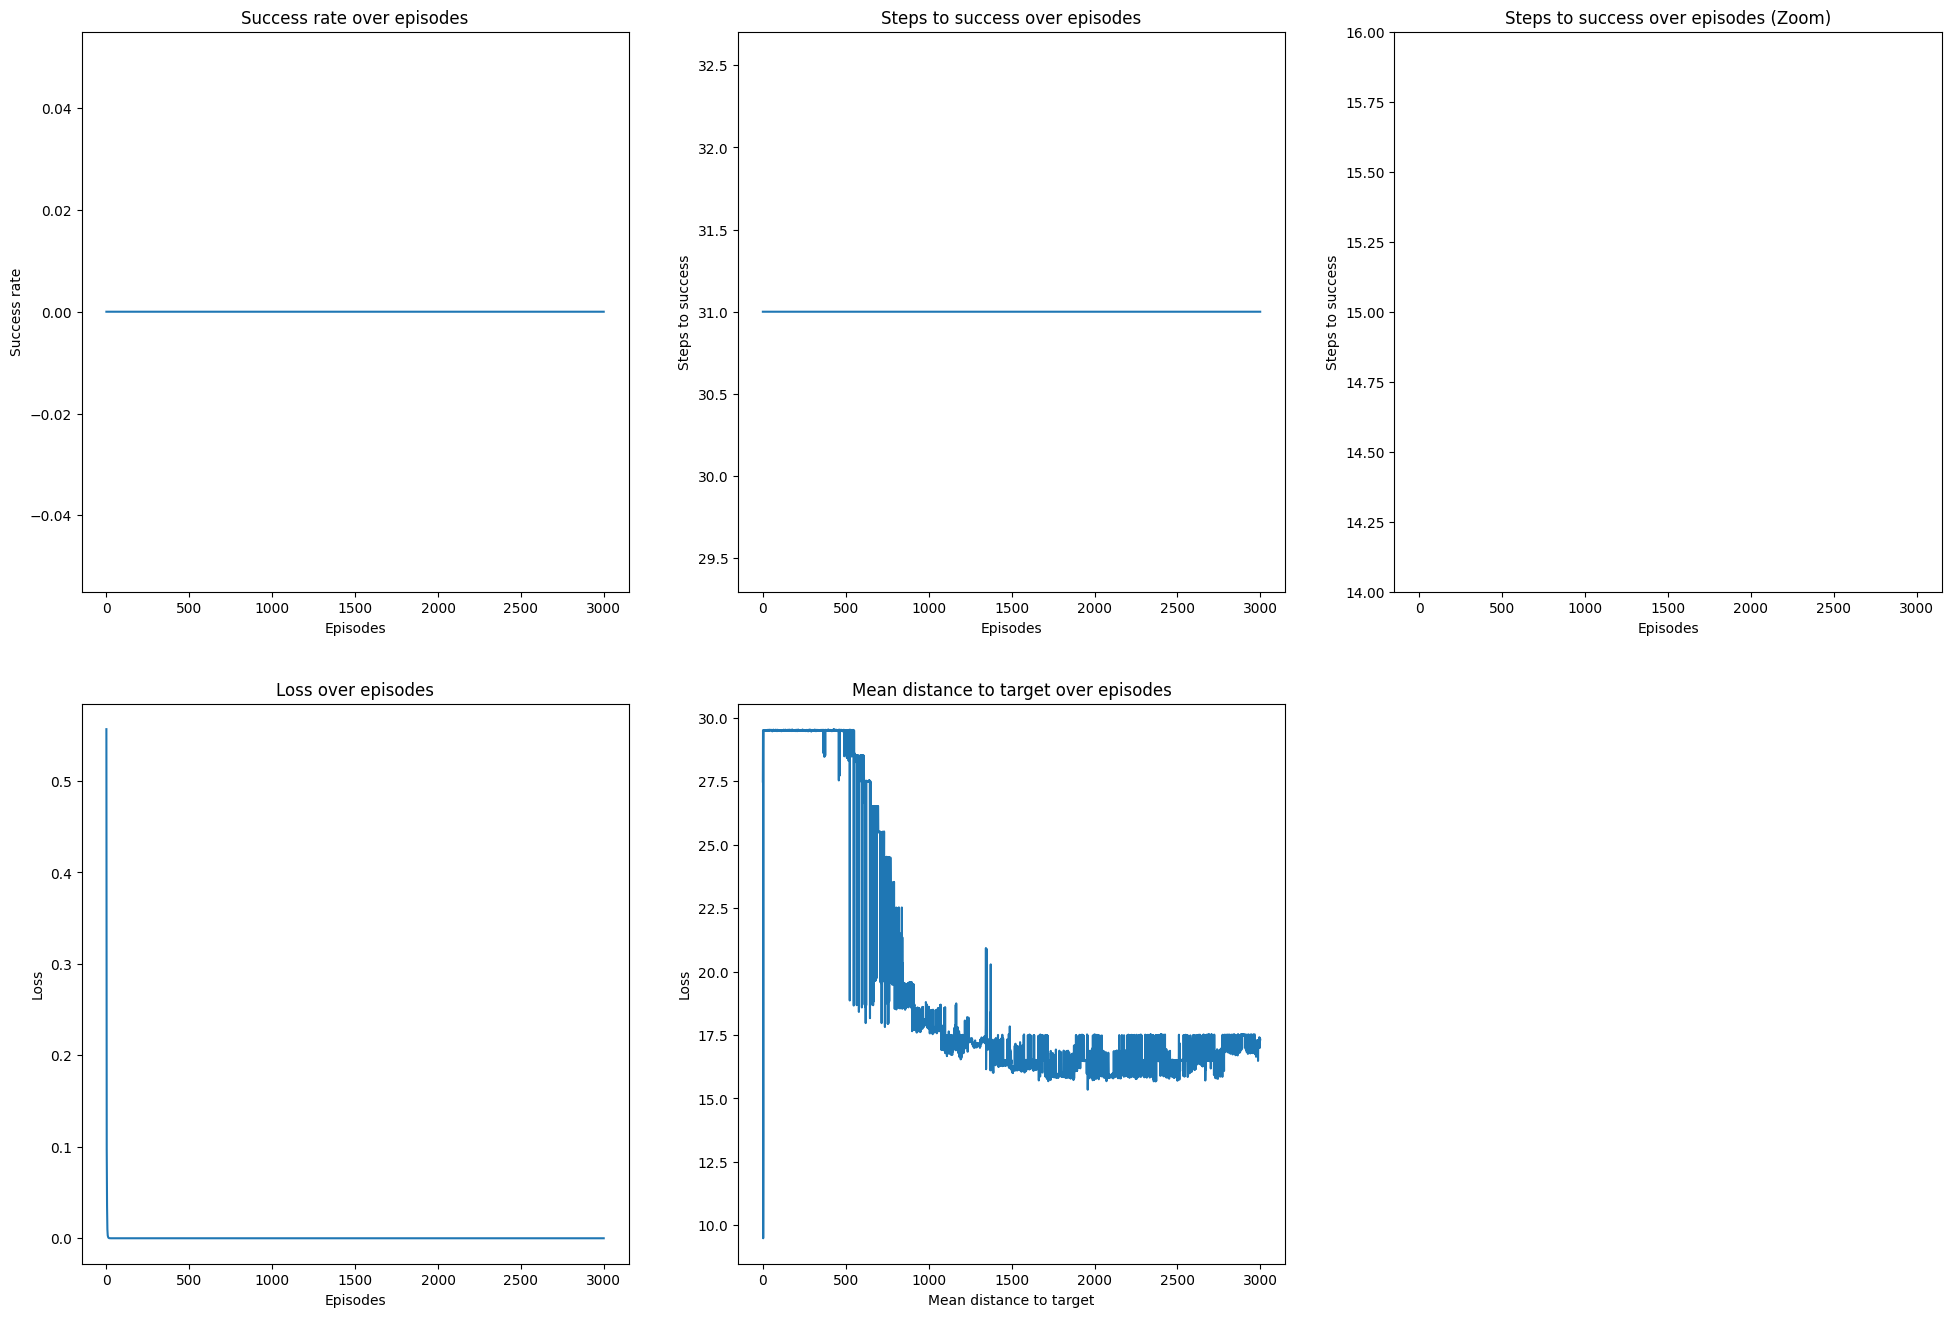

In [7]:
agent, env = train_DQN_agent(30, device=device, episodes=3000, use_HER=False, model_type=runtime.HANDCRAFTED)